### Investigating Factors Affecting Heart Attack using SVM

This project aims to predict the risk of heart attack for an individual given their vital signs. This may help in the prevention of heart attacks by alerting and furthermore, it might provide more insight on the relation of different vital signs and how they may potentially contribute to heightening risk of heart attacks. Professionals in the medical field may also find some use for this by finding potential early warning signs of heart failure so that preventative treatment can begin early for those at risk.

### Import libraries and dataset

Using the Heart Attack Analysis & Prediction Dataset taken from Kaggle. 

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Prepare the dataset for training and testing

Any null values are dropped to prevent errors when transforming the data. The values are then categorized into independent variables and the dependent variable (or the output). The data is then split into the training and the testing sets; 70% of the data will be used for training the model.

In [13]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values                                              # independent variables
y = data.iloc[:,13].values                                                                          # dependent variable

# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=202006914)  

### Normalize the data
StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1. This is to ensure the values have a unit norm and minimizes the chances of suboptimal results caused by larger values. This also improves the rate of convergence and the model's performance.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train and test the model 

In [15]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.8131868131868132

After training and testing the model, we can see that it currently has an accuracy score of 81.32%. This can be improved later on.

### Evaluating the model

### Generate the confusion matrix

Text(113.9222222222222, 0.5, 'true value')

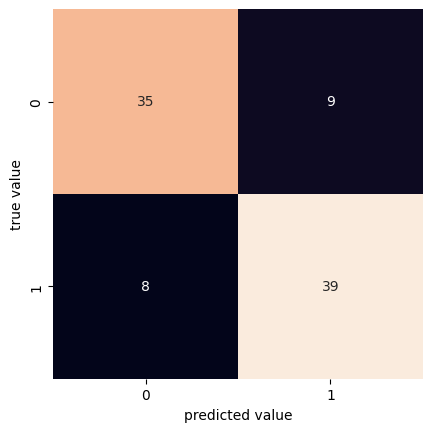

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

The confusion matrix shows that the model makes relatively equal mistakes for both the at-risk and low-risk results.

### Print the classification report

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        44
           1       0.81      0.83      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Improve the model by hyperparameter tuning. Use GridSearchCV.

In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 
              'gamma': [1, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 
                        0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.001, 0.00001, 0.000001]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 161 candidates, totalling 805 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.558 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.558 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.548 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.548 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.571 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.791 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.721 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.09;, score=0.791 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
                                   0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006,
                                   0.005, 0.004, 0.003, 0.002, 0.001, 0.001,
                                   1e-05, 1e-06]},
             verbose=3)

### Show the best parameters found and use them to generate the predictions.

In [19]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
accuracy_score(y_test, grid_predictions)

{'C': 100, 'gamma': 0.002}


0.8571428571428571

After using trial and error with GridSearch, the parameters with the best results were a penalty parameter (C) value of 100 and a gamma value of 0.002. Using these values improved the model from its previous accuracy score of 81.32% to 85.71%.

### Display the confusion matrix 

Text(113.9222222222222, 0.5, 'true value')

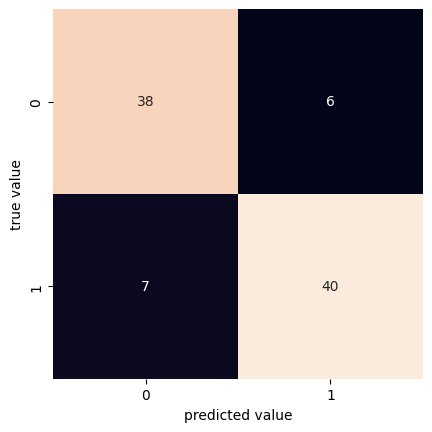

In [20]:
mat = confusion_matrix(y_test,grid_predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value') 

We can see that the model now makes less mistakes for both the at-risk and low-risk results compared to the model before implementing Grid Search.

### Display the classification report

In [21]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.87      0.85      0.86        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



Since we are dealing with patients at risk for heart attack, it's crucial that the recall scores are as high as possible since it shows how many Actual Positives it labelled correctly (in this case, it would be bad to label an at-risk patient to as a low-risk oatient). The recall score for 0 improved from 0.80 to 0.86 and the recall score for 1 from 0.83 to 0.85.

### Predictor Tester

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

parameters = [[40,1,0,120,229,0,0,129,1,2.6,1,2,3]] #[age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output]

x = sc.transform(parameters)
y = grid.predict(x)
print(y)

[0]


### Visualization

We will use PCA (Principal Component Analysis) to combine the 14 features into 2 orthogonal meta-features that we can use as axes for a graph.

Source:
https://github.com/kr-aashish/Heart-disease-prediction-using-SVM/blob/master/support_vector_machines_teacher.ipynb

Fitting 5 folds for each of 161 candidates, totalling 805 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.767 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.814 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.857 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.810 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.762 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.791 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.837 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.786 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.09;, score=0.791 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.0

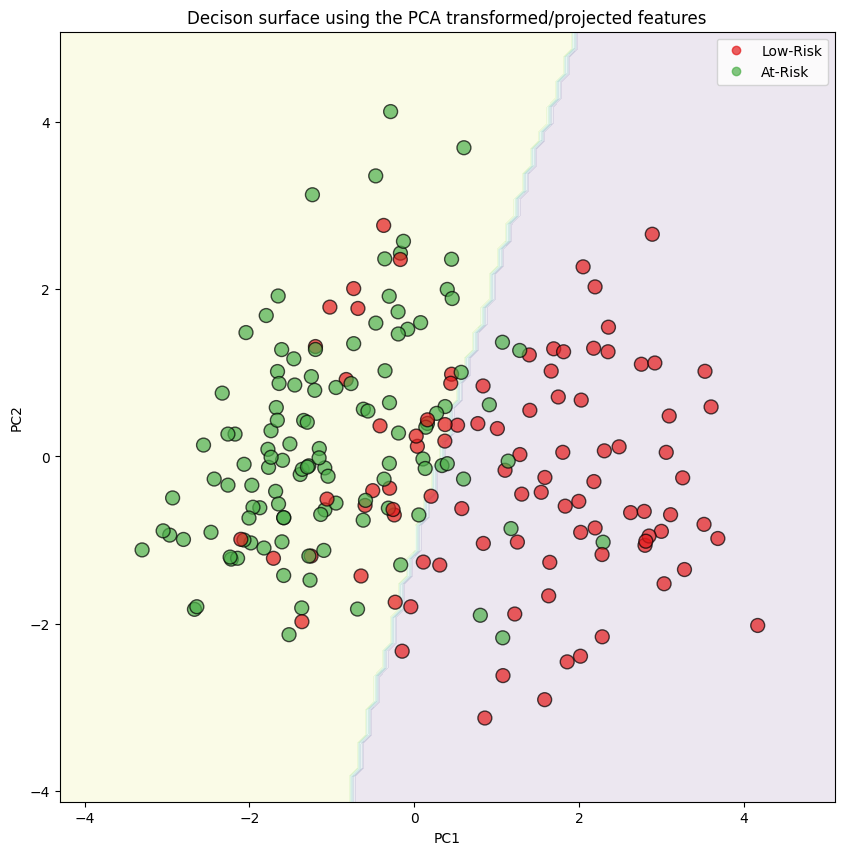

In [23]:
from sklearn.decomposition import PCA # to perform PCA to plot the data
import matplotlib.colors as colors

pca = PCA()
X_train_pca = pca.fit_transform(X_train) 

pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

grid.fit(np.column_stack((pc1, pc2)), y_train)

x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = grid.predict(np.column_stack((xx.ravel(), yy.ravel())))   

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1) 

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])\

scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("Low-Risk")
legend.get_texts()[1].set_text("At-Risk")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()

In the graph above, the green dots represent the datapoints of individuals who are At-Risk for a heart disease while the red dots represent the datapoints of individuals who are Low-Risk for heart diseases. We can see that the SVM model created is able to predict at a sufficient enough accuracy if a certain individual (not within the dataset) is at risk of a heart attack based from the decision surface the model has created. The graph clearly shows the division in those who are at low risk and high risk. There are certain outliers, but these are to be expected as the accuracy of the model is atleast 80%

# Discussion

To evaluate the created SVM model, it will be compared with an analysis of a different dataset namely the Cleveland Heart Disease(UCI Repository) dataset by Shubhankar Rawat (retrieved from https://towardsdatascience.com/heart-disease-prediction-73468d630cfc). 

The study took a look at the following models: SVM, Naive Bayes, Logistic Regression, Decision Tree, Random Forest, LightGBM, XGboost. Note however, that the SVM here does not implement Grid Search.

In [24]:
import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


df = pd.read_csv('cleveland.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

import matplotlib.pyplot as plt
import seaborn as sns

# distribution of target vs age 
# sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
# sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
# plt.title('Variation of Age for each target class')
# plt.show()

 
# # barplot of age vs sex with hue = target
# sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
# plt.title('Distribution of age vs sex with the target class')
# plt.show()

df['sex'] = df.sex.map({'female': 0, 'male': 1})

Accuracy_score = []


################################## data preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#########################################   SVM   #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
# print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification


#########################################   Naive Bayes  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
# print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification


#########################################   Logistic Regression  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
# print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification

#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
# print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification


#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
# print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification

###############################################################################
# applying lightGBM
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
# print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification


###############################################################################
# applying XGBoost

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
# print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy_score.append(format((cm_test[0][0] + cm_test[1][1])/len(y_test))) #modification


#########################################  MODIFICATION  #############################################################
data = pd.DataFrame({
    'Model Name': ['SVM', 'Naive Bayes', 'Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost'],
    'Accuracy_score': Accuracy_score
})
data



Accuracy for test set for svm = 0.8032786885245902

Accuracy for test set for Naive Bayes = 0.7868852459016393

Accuracy for test set for Logistic Regression = 0.8032786885245902


c:\Users\59cha\Downloads\VitalCheck\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy for test set for Decision Tree = 0.7704918032786885

Accuracy for test set for Random Forest = 0.819672131147541


ModuleNotFoundError: No module named 'lightgbm'

As seen from the table above, out of all the models created by Ml, the Linear SVM and the Kernel SVM were the best performing models with accuracy scores of 83.6% which is still lower than the model we created (with an accuracy of 85.71%).